In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Carseats.csv')

In [3]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [9]:
data_map = {'Bad':0,'Good':1,'Medium':2}

In [10]:
df['ShelveLoc_new'] = df['ShelveLoc'].map(data_map) 

In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [12]:
df.drop('ShelveLoc',axis=1,inplace=True)

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,38,13,Yes,No,0


In [40]:
df_new = pd.get_dummies(df,drop_first=True)

In [41]:
df_new.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,2,1,1
3,7.40,117,100,4,466,97,55,14,2,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


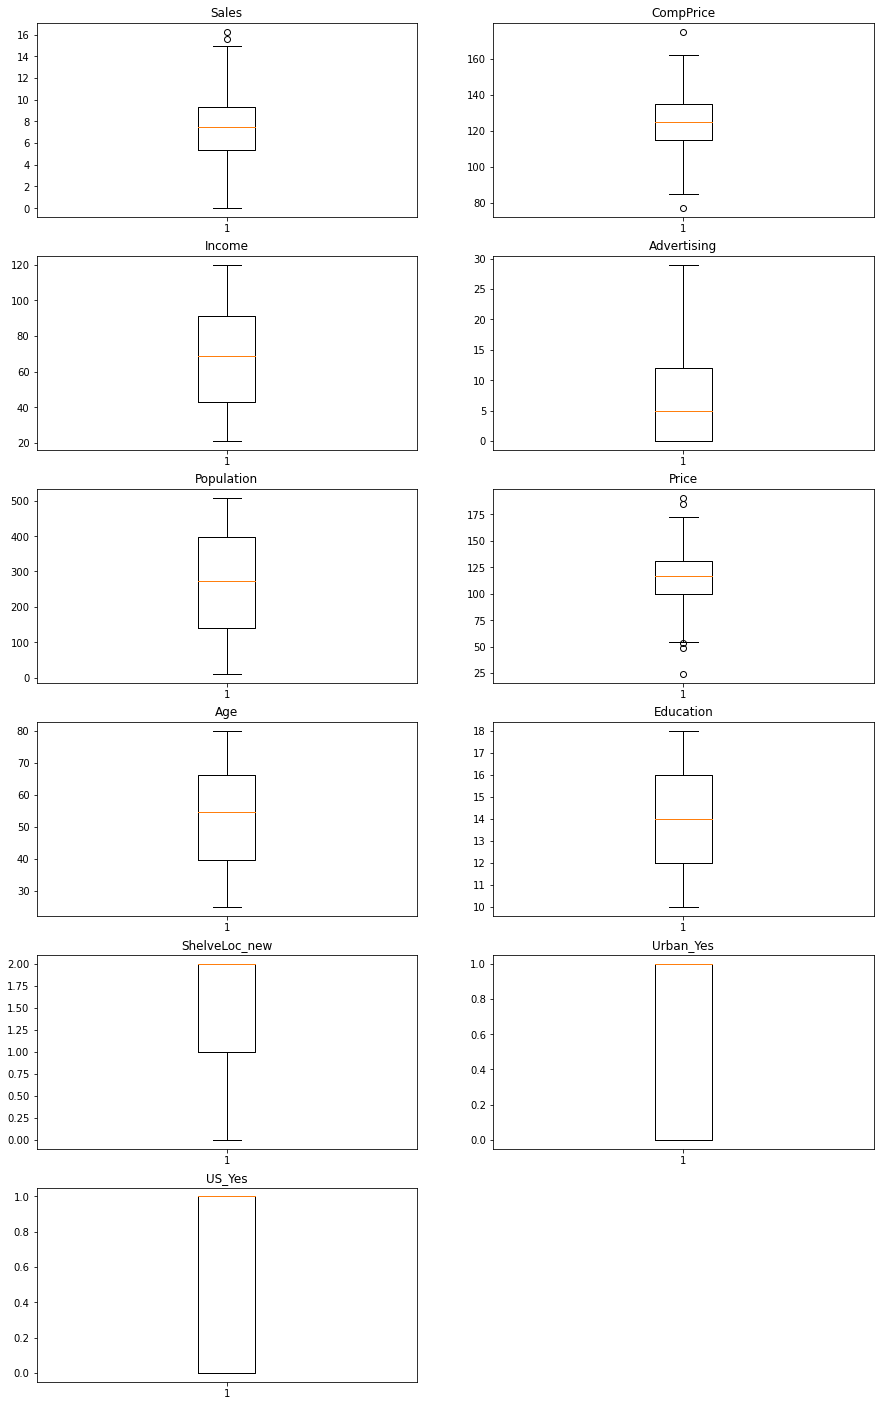

In [22]:
plt.figure(figsize = (15,25))
count = 1
for col in df_new.columns:
    plt.subplot(6,2,count)
    plt.boxplot(df_new[col])
    plt.title(col)
    count += 1
plt.show()

In [24]:
df_new.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.157470,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.023350,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.067678,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.008544,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.044772,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.014633,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.056488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.001492,-0.033094,-0.078250
ShelveLoc_new,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,0.056488,0.001492,1.000000,-0.063978,-0.039760
Urban_Yes,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.063978,1.000000,0.047085


In [25]:
x = df_new.iloc[:,1:].values
y = df_new.iloc[:,0].values

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [27]:
x_train.shape

(320, 10)

In [28]:
y_train.shape

(320,)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_pred)

0.42546908925360205

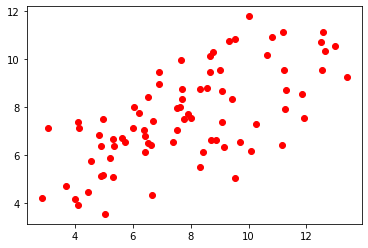

In [37]:
plt.scatter(y_test,y_pred,color ='red')
plt.show()